In [ ]:
import numpy as np

import pandas as pd

import os

import matplotlib.pyplot as plt

import seaborn as sns 



In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
 !kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

In [ ]:
file1 = zipfile.ZipFile('/content/heart-attack-analysis-prediction-dataset.zip')
file1.extractall()

In [ ]:
data = pd.read_csv('/content/heart.csv')

data


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
heat = data.corr()

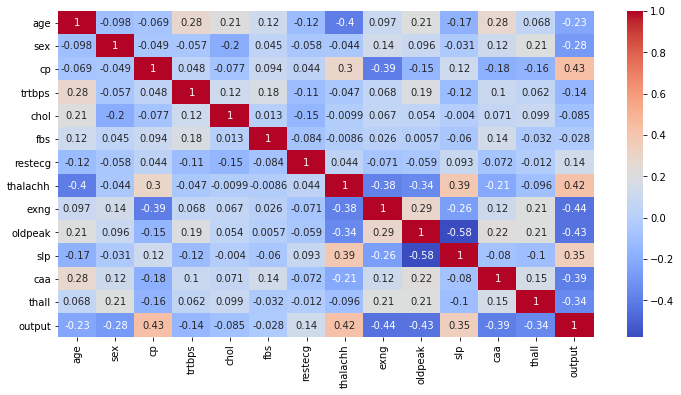

In [ ]:

plt.figure(figsize=(12,6))
sns.heatmap(heat,cmap='coolwarm',annot=True)

In [ ]:
X = data[['cp' , 'restecg' , 'thalachh' ,  'slp']]
y = data[['output']]

In [ ]:
X.dtypes 

cp          int64
restecg     int64
thalachh    int64
slp         int64
dtype: object

In [ ]:
y.dtypes

output    int64
dtype: object

In [ ]:
X.isnull().sum()

cp          0
restecg     0
thalachh    0
slp         0
dtype: int64

In [ ]:
y.isnull().sum()

output    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()


X = scaled.fit_transform(X)
y = scaled.fit_transform(y)


print(X.shape)
print(y.shape)

(303, 4)
(303, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn import svm

model_svm_class = svm.SVC()

model_svm_class.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm = model_svm_class.predict(X_test)

In [ ]:
model_svm_class.score(X_test , y_test)

0.72

In [ ]:
y_true = y_test.copy()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report  =classification_report(y_true , y_pred_svm)

In [ ]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.63      0.79      0.70        42\n         1.0       0.81      0.67      0.74        58\n\n    accuracy                           0.72       100\n   macro avg       0.72      0.73      0.72       100\nweighted avg       0.74      0.72      0.72       100\n'

In [ ]:
# sns.heatmap(report ,  annot=True)

In [ ]:
from sklearn.metrics import accuracy_score



print('accuracy score: ' , accuracy_score(y_true , y_pred_svm))

accuracy score:  0.72


In [ ]:
# plt.plot(np.arange(len(y_true)) , y_true)


from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred_svm)

array([[33,  9],
       [19, 39]])

In [ ]:
from sklearn.metrics import  plot_confusion_matrixs

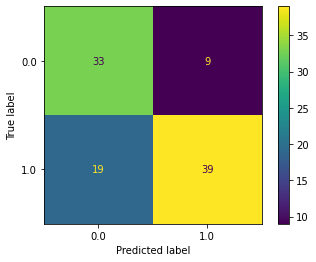

In [ ]:
matrix = plot_confusion_matrix(model_svm_class , X_test , y_test)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)



clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf_predict = clf.predict(X_test)

In [ ]:
print('accuracy score: ' , accuracy_score(y_true ,clf_predict))

accuracy score:  0.76


# Naive bayees


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
y_train_naive = y_train.ravel()
y_train_naive.shape

(203,)

In [ ]:
naive_bay = GaussianNB()

naive_bay.fit(X_train , y_train_naive)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naive_bay.score(X_test , y_test)

0.75

# Neural Network

In [ ]:
# sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [ ]:
import keras

from keras.models import Sequential

from keras.layers import Dense

In [ ]:
X_train.shape

(203, 4)

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=4, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(10, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))




model.compile(loss='binary_crossentropy', optimizer='adam')


model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)



Epoch 1/500
7/7 [==============================] - 1s 3ms/step - loss: 0.6880
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6909
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6844
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6831
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6819
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6806
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6737
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6769
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6773
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6763
Epoch 11/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6703
Epoch 12/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6740
Epoch 13/500
7/7 [==============================] - 0s 3ms/st

In [ ]:
nn_predict = model.predict(X_test)

In [ ]:
model.

AttributeError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
print(X_train.shape)
print(y_train.shape)


y_train_wala = y_train.ravel()
print(y_train_wala.shape)

(203, 4)
(203, 1)
(203,)


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,   hidden_layer_sizes=(5, 2), random_state=1)



clf.fit(X_train, y_train_wala)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)